In [10]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import time

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

c:\Users\rohan\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)


In [4]:
# Train a Random Forest classifier on the original dataset
print("Training Random Forest classifier on the original dataset...")
start_time = time.time()
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train[:60000], y_train[:60000])
training_time = time.time() - start_time
print("Training time: {:.2f} seconds".format(training_time))

Training Random Forest classifier on the original dataset...
Training time: 52.74 seconds


In [5]:
# Evaluate the Random Forest classifier on the test set
score = rf_clf.score(X_test, y_test)
print("Original dataset - Test set accuracy: {:.2f}%".format(score * 100))

Original dataset - Test set accuracy: 96.74%


In [6]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=0.95, random_state=42)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [7]:
# Train a new Random Forest classifier on the reduced dataset
print("\nTraining Random Forest classifier on the reduced dataset...")
start_time = time.time()
rf_clf_reduced = RandomForestClassifier(random_state=42)
rf_clf_reduced.fit(X_train_reduced[:60000], y_train[:60000])
training_time_reduced = time.time() - start_time
print("Training time with dimensionality reduction: {:.2f} seconds".format(training_time_reduced))



Training Random Forest classifier on the reduced dataset...
Training time with dimensionality reduction: 176.91 seconds


In [8]:
# Evaluate the new Random Forest classifier on the test set
score_reduced = rf_clf_reduced.score(X_test_reduced, y_test)
print("Reduced dataset - Test set accuracy: {:.2f}%".format(score_reduced * 100))

Reduced dataset - Test set accuracy: 94.69%


In [11]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
# Load Olivetti Faces dataset
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\rohan\scikit_learn_data


In [13]:
# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, stratify=faces.target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

In [14]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=40, random_state=42)
kmeans.fit(X_train)

c:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=40, random_state=42)

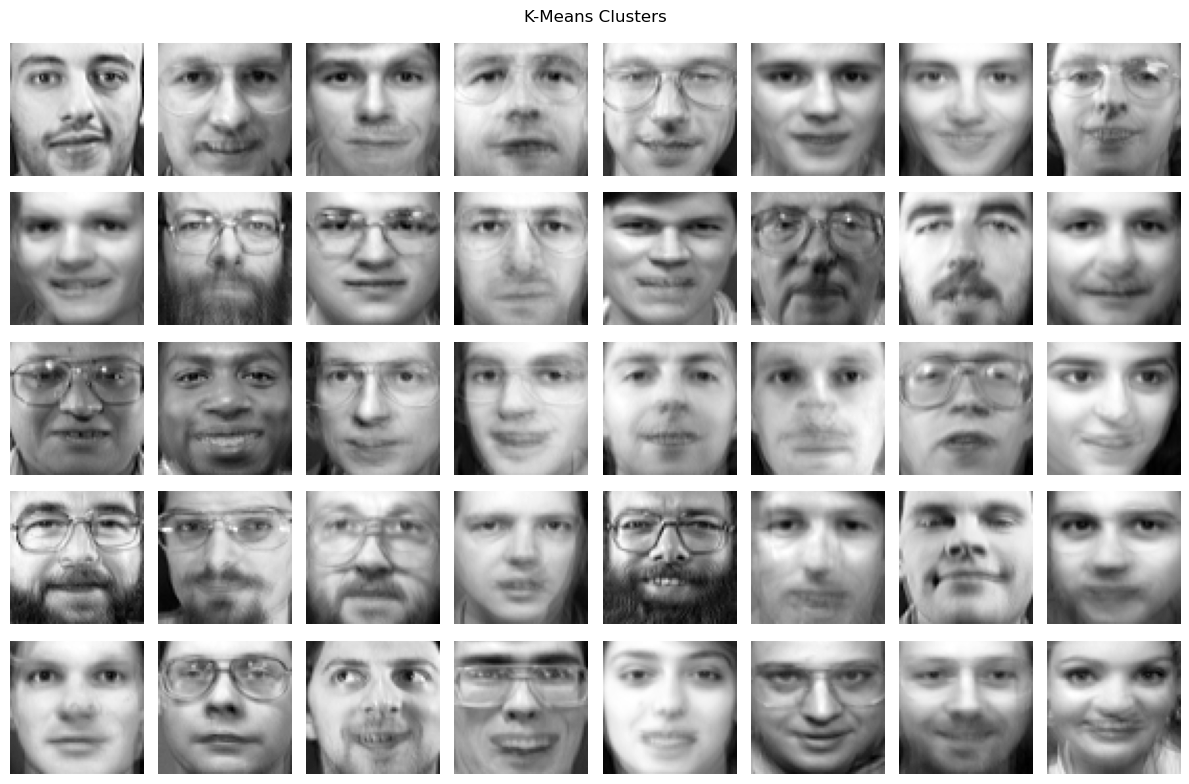

In [15]:
# Visualize the clusters
fig, axs = plt.subplots(5, 8, figsize=(12, 8))
for i, ax in enumerate(axs.flatten()):
    cluster_center = kmeans.cluster_centers_[i]
    ax.imshow(cluster_center.reshape(64, 64), cmap='gray')
    ax.axis('off')
plt.suptitle("K-Means Clusters")
plt.tight_layout()
plt.show()

In [21]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np

In [22]:
# Step 1: Load the Olivetti Faces dataset
faces_data = fetch_olivetti_faces()
X = faces_data.data
y = faces_data.target

In [23]:
# Step 2: Split the dataset into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, stratify=y_val_test, random_state=42)

In [24]:
# Step 3: Train and evaluate a classifier on the validation set
classifier = SVC()
classifier.fit(X_train, y_train)
val_predictions = classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation accuracy without dimensionality reduction:", val_accuracy)


Validation accuracy without dimensionality reduction: 0.925


In [25]:
# Step 4: Use K-Means for dimensionality reduction
best_clusters = None
best_accuracy = 0.0

In [26]:
for n_clusters in range(2, 41):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    reduced_features = kmeans.fit_transform(X_train)

c:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [27]:
# Step 5: Train a classifier on the reduced set and evaluate on the validation set
classifier = SVC()
classifier.fit(reduced_features, y_train)
val_predictions = classifier.predict(kmeans.transform(X_val))
val_accuracy = accuracy_score(y_val, val_predictions)
    
if val_accuracy > best_accuracy:
    best_accuracy = val_accuracy
    best_clusters = n_clusters

print("Best number of clusters for dimensionality reduction:", best_clusters)
print("Validation accuracy with dimensionality reduction:", best_accuracy)


Best number of clusters for dimensionality reduction: 40
Validation accuracy with dimensionality reduction: 0.575


In [28]:
# Step 6: Append reduced features to the original features and train a classifier
kmeans = KMeans(n_clusters=best_clusters, random_state=42)
reduced_features = kmeans.fit_transform(X_train)
combined_features = np.concatenate((X_train, reduced_features), axis=1)


c:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [29]:
classifier = SVC()
classifier.fit(combined_features, y_train)
val_predictions = classifier.predict(np.concatenate((X_val, kmeans.transform(X_val)), axis=1))
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation accuracy with appended reduced features:", val_accuracy)

Validation accuracy with appended reduced features: 0.475
